# **Import Libraries and get dataset**

In [97]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_absolute_error
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.svm import SVC
from sklearn.cluster import KMeans
import skfuzzy as fuzz
from pyswarm import pso

In [98]:
dataset = pd.read_csv('data/data-tc.csv')

In [99]:
dataset.head()

,B_Req,R_Priority,FP,Complexity,Time,Cost
0,1,94,"TC#2027,TC#2928,TC#2053",3,4.0,60.0
1,2,197,"TC#3269,TC#1752,TC#1042",3,4.0,60.0
2,3,163,"TC#2843,TC#3332,TC#805,TC#2785",3,5.0,75.0
3,4,103,"TC#1618,TC#953,TC#1368",1,4.0,20.0
4,5,70,"TC#235,TC#3170,TC#2423",5,4.0,100.0


In [100]:
isCount = dataset['FP'].count()
print(f'Total Data is {isCount}')

Total Data is 3314


**The Method Used :**
1. Fuzzy Logic ✅
2. K Means ✅
3. SVM ♻️
4. K-Means PSO

# **K-Means** 

Silhouette Score 0.6493910341258399

In [101]:
kmeans_dataset = dataset

X = kmeans_dataset[['Complexity', 'Time', 'Cost']]

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans_dataset['Cluster'] = kmeans.fit_predict(X)

kmeans_dataset.tail()

,B_Req,R_Priority,FP,Complexity,Time,Cost,Cluster
3309,3310,S,"TC#261,TC# 934",1,3.0,21.0,2
3310,3311,S,"TC#299,TC# 290,TC# 2090",3,4.0,84.0,1
3311,3312,C,"TC#1289,TC# 652,TC# 1061",3,4.0,84.0,1
3312,3313,M,"TC#1003,TC# 1407,TC# 922",1,5.0,35.0,2
3313,3314,W,"TC#1321,TC# 1675,TC# 1095,TC# 2573",1,4.5,31.5,2


In [102]:
y = kmeans_dataset['Cluster']

In [103]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

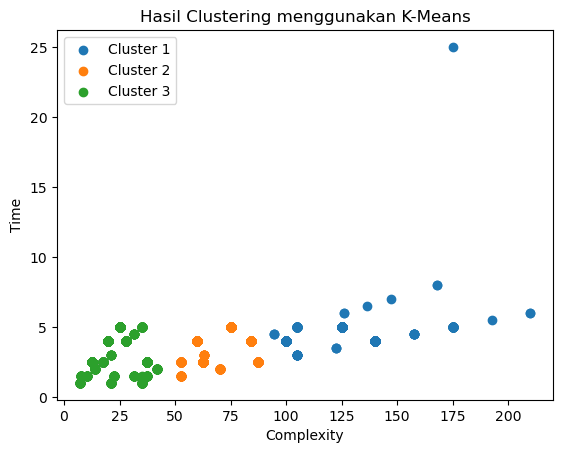

In [104]:
for cluster_num in range(3):
    cluster_data = dataset[kmeans_dataset['Cluster'] == cluster_num]
    plt.scatter(
        # cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

plt.xlabel('Complexity')
plt.ylabel('Time')
plt.legend()
plt.title('Hasil Clustering menggunakan K-Means')
plt.show()

In [105]:
score_avg = silhouette_score(X, kmeans_dataset['Cluster'])
print(f"Score: {score_avg}")

Score: 0.6493910341258399


# **Fuzzy Logic** (masih evaluasi)

Correct Cluster: 0.16018099547511322

In [106]:
encoder = LabelEncoder()
X = dataset[['Complexity','Time','Cost','Cluster']]
y = dataset['Cluster']

In [107]:
# encoder = LabelEncoder()
# scaler = MinMaxScaler()
# for col in X :
#     X[col] = encoder.fit_transform(X[col])

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [109]:
fuzzy_dataset = dataset

B_Req = ctrl.Antecedent(np.arange(0, 201, 1), 'B_Req')
R_Priority = ctrl.Antecedent(np.arange(0, 201, 1), 'R_Priority')
Complexity = ctrl.Antecedent(np.arange(1, 6, 1), 'Complexity')
Time = ctrl.Antecedent(np.arange(1, 6, 1), 'Time')
Cost = ctrl.Antecedent(np.arange(20, 101, 1), 'Cost')

fuzzy_dataset = fuzzy_dataset.drop(['Cluster'],axis=1)
Cluster = ctrl.Consequent(np.arange(1, 4, 1), 'Cluster')

Complexity.automf(3)
Time.automf(3)
Cost.automf(3)

In [110]:
Cluster['low'] = fuzz.trimf(Cluster.universe, [1, 1, 1])
Cluster['medium'] = fuzz.trimf(Cluster.universe, [2, 2, 2])
Cluster['high'] = fuzz.trimf(Cluster.universe, [3, 3, 3])

Complexity['low'] = fuzz.trimf(Complexity.universe, [1, 2, 3])
Complexity['medium'] = fuzz.trimf(Complexity.universe, [2, 3, 4])
Complexity['high'] = fuzz.trimf(Complexity.universe, [3, 4, 5])

Time['low'] = fuzz.trimf(Time.universe, [1, 7, 14])
Time['medium'] = fuzz.trimf(Time.universe, [7, 14, 21])
Time['high'] = fuzz.trimf(Time.universe, [14, 21, 28])

Cost['low'] = fuzz.trimf(Cost.universe, [7, 50, 100])
Cost['medium'] = fuzz.trimf(Cost.universe, [50, 100, 150])
Cost['high'] = fuzz.trimf(Cost.universe, [100, 150, 210])

In [111]:
rule1 = ctrl.Rule(Complexity['low'] | Time['low'] | Cost['low'], Cluster['low'])
rule2 = ctrl.Rule(Complexity['medium'] | Time['medium'] | Cost['medium'], Cluster['medium'])
rule3 = ctrl.Rule(Complexity['high'] | Time['high'] | Cost['high'], Cluster['high'])
rule4 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['medium'], Cluster['medium'])
rule5 = ctrl.Rule(Complexity['medium'] | Time['low'] | Cost['low'], Cluster['medium'])
rule6 = ctrl.Rule(Complexity['high'] | Time['high'] | Cost['high'], Cluster['high'])
rule7 = ctrl.Rule(Complexity['low'] | Time['low'] | Cost['medium'], Cluster['medium'])
rule8 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['low'], Cluster['medium'])
rule9 = ctrl.Rule(Complexity['medium'] | Time['low'] | Cost['medium'], Cluster['high'])
rule10 = ctrl.Rule(Complexity['medium'] | Time['medium'] | Cost['medium'], Cluster['medium'])
rule11 = ctrl.Rule(Complexity['high'] | Time['low'] | Cost['low'], Cluster['low'])
rule12 = ctrl.Rule(Complexity['high'] | Time['medium'] | Cost['low'], Cluster['medium'])
rule13 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['medium'], Cluster['low'])
rule14 = ctrl.Rule(Complexity['high'] | Time['low'] | Cost['high'], Cluster['high'])
rule15 = ctrl.Rule(Complexity['low'] | Time['high'] | Cost['high'], Cluster['high'])
rule16 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['high'], Cluster['medium'])
rule17 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['high'], Cluster['high'])
rule18 = ctrl.Rule(Complexity['high'] | Time['high'] | Cost['low'], Cluster['medium'])
rule19 = ctrl.Rule(Complexity['low'] | Time['high'] | Cost['medium'], Cluster['medium'])
rule20 = ctrl.Rule(Complexity['medium'] | Time['medium'] | Cost['high'], Cluster['high'])
rule21 = ctrl.Rule(Complexity['high'] | Time['medium'] | Cost['medium'], Cluster['low'])
rule22 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['low'], Cluster['medium'])
rule23 = ctrl.Rule(Complexity['low'] | Time['high'] | Cost['low'], Cluster['low'])
rule24 = ctrl.Rule(Complexity['high'] | Time['medium'] | Cost['high'], Cluster['high'])
rule25 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['medium'], Cluster['medium'])
rule26 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['high'], Cluster['high'])
rule27 = ctrl.Rule(Complexity['low'] | Time['medium'] | Cost['high'], Cluster['high'])
rule28 = ctrl.Rule(Complexity['medium'] | Time['high'] | Cost['low'], Cluster['low'])
rule29 = ctrl.Rule(Complexity['high'] | Time['low'] | Cost['medium'], Cluster['medium'])
rule30 = ctrl.Rule(Complexity['low'] & Time['low'] & Cost['low'], Cluster['low'])
rule31 = ctrl.Rule(Complexity['medium'] & Time['medium'] & Cost['medium'], Cluster['medium'])
rule32 = ctrl.Rule(Complexity['high'] & Time['high'] & Cost['high'], Cluster['high'])
rule33 = ctrl.Rule(Complexity['low'] & Time['medium'] | Cost['high'], Cluster['medium'])
rule34 = ctrl.Rule(Complexity['high'] | Time['medium'] & Cost['low'], Cluster['high'])

clustering_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
    rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, 
    rule29, rule30, rule31, rule32, rule33, rule34
])

In [112]:
profit_sim = ctrl.ControlSystemSimulation(clustering_ctrl)
predictions = []
true_values = X_test['Cluster'].tolist()

X_test.drop('Cluster', axis=1, inplace=True)

clustering = ctrl.ControlSystemSimulation(clustering_ctrl)

In [113]:
for i in range(len(X_test)):
    for column in X_test.columns:
        profit_sim.input[column] = X_test.iloc[i][column]

    profit_sim.compute()

    predicted_profit_category = profit_sim.output['Cluster']
    predictions.append(round(predicted_profit_category, 1))

In [114]:
mae = mean_absolute_error(true_values, predictions)
print("Correct Cluster (1 - Mae):", 1.0 - mae)

Correct Cluster (1 - Mae): 0.16018099547511322


# **SVM** (masih evaluasi)

Classification 1.0

In [115]:
X = dataset[['Complexity','Time','Cost','Cluster']]
y = dataset['Cluster']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [117]:
svm_dataset = dataset
svm_dataset = svm_dataset.drop(['Cluster'],axis=1)

In [118]:
params_grid = [
       {
           'kernel': ['rbf'],
           'gamma': [1e-3, 1e-4],
           'C': range(10, 100, 20)
       },
        {
            'kernel': ['linear'],
            'gamma': [1e-3, 1e-4],
            'C': range(10, 100, 20)
        }
    ]

In [119]:
svm_model = GridSearchCV(SVC(), params_grid, cv=2)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': range(10, 100, 20), 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': range(10, 100, 20), 'gamma': [0.001, 0.0001],
                          'kernel': ['linear']}])

In [120]:
cv_results_dt = pd.DataFrame(svm_model.cv_results_)
cv_results_dt.sort_values("rank_test_score").head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003444,0.000067,0.002337,0.000112,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",1.0,1.0,1.0,0.0,1


In [121]:
svm_model = svm_model.best_estimator_
Y_pred = svm_model.predict(X_test)

In [122]:
print(confusion_matrix(y_test,Y_pred))
print("\n")
print(classification_report(y_test,Y_pred))

[[174   0   0]
 [  0 209   0]
 [  0   0 280]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00       209
           2       1.00      1.00      1.00       280

    accuracy                           1.00       663
   macro avg       1.00      1.00      1.00       663
weighted avg       1.00      1.00      1.00       663



# **K-Means PSO** (masih evaluasi)

Silhouette Score: 0.7002393833835252

In [130]:
pso_dataset = dataset[['Complexity','Time','Cost']]
# pso_dataset = pso_dataset.drop(['Cluster'],axis=1)

In [131]:
def kmeans_inertia(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    return kmeans.inertia_

In [132]:
def pso_objective(k_values, X):
    k = int(k_values[0])
    return kmeans_inertia(X, k)

In [133]:
best_inertia, best_k = pso(pso_objective, lb=[2], ub=[5], args=(pso_dataset,))
best_k = int(best_k)
best_inertia = int(best_inertia[0])
print(f"Jumlah cluster terbaik: {best_k}")
print(f"Jumlah inertia terbaik: {best_inertia}")


Stopping search: Swarm best objective change less than 1e-08
Jumlah cluster terbaik: 241295
Jumlah inertia terbaik: 5


In [134]:
best_kmeans = KMeans(n_clusters=best_inertia, random_state=42)
best_kmeans.fit(pso_dataset)

labels = best_kmeans.labels_
print("Label cluster untuk setiap data point:", labels)

print("Pusat cluster:", best_kmeans.cluster_centers_)

Label cluster untuk setiap data point: [0 0 0 ... 1 2 2]
Pusat cluster: [[  3.60049628   3.53101737  63.28411911]
 [  4.34169279   3.83855799  94.88087774]
 [  1.65582656   3.04065041  23.60128726]
 [  4.97484277   4.5754717  131.50314465]
 [  4.89473684   5.32894737 174.35526316]]


In [135]:
silhouette_avg = silhouette_score(pso_dataset, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7002393833835252
